# Искусственный Интеллект
## Рабочая тетрадь № 6
### Хречко Сергей Викторович ИКБО-03-21

## Теоретический материал – Эволюционные методы
Эволюционные методы относятся к числу эффективных средств
решения задач оптимизации и структурного синтеза проектных решений.
Они основаны на использовании принципов оптимального приспособления
организмов в живой природе к условиям окружающей среды. К числу
эволюционных относятся методы генетические, колонии муравьев,
поведения толпы. Наиболее развиты и востребованы в настоящее время
генетические алгоритмы. По мере развития техники и технологий растет
доля сложных задач проектирования и управления, для решения которых
применение традиционных методов проблематично. Поэтому все большее
внимание уделяется применению методов искусственного интеллекта.
Генетические алгоритмы Для применения ГА необходимо:

1. выделить совокупность свойств объекта, характеризуемых
внутренними параметрами и влияющих на его полезность, т.е. выделить
множество управляемых параметровX=(x_1,x_2,…,x_n) среди x_i могут
быть величины различных типов (real, integer, Boolean, enumeration).
Наличие нечисловых величин (enumeration) обусловливает возможность
решения задач не только параметрической, но и структурной оптимизации;

2. сформулировать количественную оценку полезности вариантов
объекта — функцию полезности F. Если в исходном виде задача
многокритериальна, то такая формулировка означает выбор скалярного
(обобщенного) критерия;

3. представить вектор X в форме хромосомы — записи
следующего вида:

X1 X2 X3 ... Xn

Этапы генетического алгоритма могут быть представлены в
следующем виде:

for (k=0; k<G; k++)

{ for (j=0; j<N; j++)

 { Выбор родительской пары хромосом;

 Кроссовер;

 Мутации;

 Оценка функции полезности F потомков;

 Селекция;

 }

 Замена текущего поколения новым;

}

G - generation

### 1.1.1 Пример
Задача:

Пусть дана начальная популяция из четырех хромосом с двумя
генами x и y. Показатель качества хромосомы оценивается функцией Z.
При равном качестве хромосом предпочтение отдается хромосоме с
большим номером. На каждом этапе хромосома a с высшим качеством
порождает четыре новых хромосомы 𝑏1, 𝑐1, 𝑏2, 𝑐2, обмениваясь генами с
двумя хромосомами b и c более низкого качества по указанной схеме:

bx+ay  cx+ay  ax+by   ax+cy

Последняя хромоcома (с низшим качеством) выбывает из
популяции. Найти максимальный показатель качества хромосомы в
популяции и общее качество популяции после четырех этапов эволюции.

In [1]:
#функция качесва
def qZ(x, y):
    return (x - 3 * y + 1) / (3 * x**2 + 3 * y**2 + 1)


def qSumZ(Z):
    return sum(Z)


def exchangeScheme(oldX, oldY, sortedId):
    x = [0 for i in range(4)]
    y = [0 for i in range(4)]

    # x[2] = oldX[sortedId[2]] # они чет в методичке напутали
    # x[3] = oldX[sortedId[2]] # схема блин не такая

    x[0] = oldX[sortedId[1]]
    y[0] = oldY[sortedId[0]]

    x[1] = oldX[sortedId[2]]
    y[1] = oldY[sortedId[0]]

    x[2] = oldX[sortedId[0]]
    y[2] = oldY[sortedId[1]]

    x[3] = oldX[sortedId[0]]
    y[3] = oldY[sortedId[2]]

    return x, y


def sorting(Z):
    sortedId = sorted(range(len(Z)), key=lambda k: Z[k])

    return sortedId


# шаг эфолюции
def evoStep(x, y, z):
    _, minId = min((value, id) for (id, value) in enumerate(z))
    x = x[:]
    y = y[:]
    z = z[:]

    x.pop(minId)
    y.pop(minId)
    z.pop(minId)

    return x, y, z


def evoSteps(x, y, stepsNum = 4):
    results = []

    for i in range(stepsNum):
        arrZ = [qZ(x[i], y[i]) for i in range(len(x))]

        x, y, z = evoStep(x, y, arrZ)

        x, y = exchangeScheme(x, y, sorting(z))

        results.append([x, y, qSumZ(arrZ), arrZ])

    return x, y, results


X = [-2, -1, 0, 1]
Y = [-2, -1, 0, 1]

results = evoSteps(X, Y)

for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z:     {max(qualityArrZ)}')


max_1_step: 1.4857142857142858
max_2_step: 0.9615384615384615
max_3_step: 1.8285714285714285
max_4_step: 1.1634615384615383
max Z:     1.0


In [6]:
# вариант 7

def myqZ(x, y):
    return (x + 3 * y - 3) / (3 * x**2 + y**2 + 1)


def myevoSteps(x, y, stepsNum = 4):
    results = []

    for i in range(stepsNum):
        arrZ = [myqZ(x[i], y[i]) for i in range(len(x))]

        x, y, z = evoStep(x, y, arrZ)

        x, y = exchangeScheme(x, y, sorting(z))

        results.append([x, y, qSumZ(arrZ), arrZ])

    return x, y, results



X = [-5, -3, -2, 0]
Y = [-1, -2, 0, 1]

results = myevoSteps(X, Y, 5)

for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z:     {max(qualityArrZ)}')

max_1_step: -0.9024725274725274
max_2_step: -2.388793103448276
max_3_step: -0.9316502463054187
max_4_step: -0.8669950738916257
max_5_step: -0.8669950738916257
max Z:     0.0


## 1.2 Теоретический материал - Метод имитации отжига
Алгоритм отжига – это метод оптимизации, который называется
отжигом, или симуляцией восстановления (Simulated annealing). Как ясно из
названия, метод поиска моделирует процесс восстановления.
Восстановление – это физический процесс, который заключается в нагреве
и последующем контролируемом охлаждении субстанции. В результате
получается прочная кристаллическая структура, которая отличается от
структуры с дефектами, образующейся при быстром беспорядочном
охлаждении. Структура здесь представляет собой кодированное решение, а
температура используется для того, чтобы указать, как и когда будут
приниматься новые решения. 

Алгоритм имитации отжига включает следующие этапы:
- 
    1. Создание начального решения
    2. Оценка решения
    3. Изменение решения случайным образом
    4. Оценка нового решения
    5. Критерий допуска
    6. Понижение температуры
    7. Повторение шагов 3-7
- 
    текущее решение -> рабочее решение (итерируемся) -> лучшее решение


Метод отжига может быть эффективным при решении задач
различных классов, требующих оптимизации. Ниже приводится их краткий
список:

1. создание пути;
2. реконструкция изображения;
3. назначение задач и планирование;
4. размещение сети;
5. глобальная маршрутизация;
6. обнаружение и распознавание визуальных объектов;
7. разработка специальных цифровых фильтров.

Поскольку метод отжига представляет собой процесс генерации
случайных чисел, поиск решения с использованием данного алгоритма
может занять значительное время. В некоторых случаях алгоритм вообще не
находит решение или выбирает не самое оптимальное. Алгоритм отжига как
способ выполнения процедур поиска и оптимизации. Данный метод является
аналогом процесса нагревания тела до состояния плавления с последующим
постепенным охлаждением. При высоких температурах поиск ведется по
всему диапазону. При снижении температуры диапазон поиска уменьшается
до небольшой области вокруг текущего решения.

Рассмотрим решение задачи поиска оптимального маршрута на графе
методом имитации отжига Для этого, представим формальную постановку
задачи и рассмотрим пример, который иллюстрирует алгоритм решения.

Итак, необходимо Найти длину гамильтонова цикла 𝑆4 в полном графе
𝐾6 после четырех циклов решения задачи методом отжига. Даны расстояния
𝐿𝑖,𝑗 между вершинами. Даны также: начальная последовательность вершин
𝐿0, последовательность замен вершин 𝑍 и выпавшие при этом вероятности
перехода 𝑃𝑘, 𝑘 = 1, . . . , 4.


Переход на худшее (∆𝑆𝑘 = 𝑆𝑘 − 𝑆𝑘−1 > 0) решение допустим, если
𝑃∗ = 100где снижение температуры происходит по закону 𝑇𝑘+1 = 0.5𝑇𝑘 от
𝑇1 = 100.

### 1.2.1 Пример
Задача: там картинки

V = [1, 4, 5, 2, 6, 3, 1]

Z = [V3 <-> V4], [V4 <-> V6], [V5 <-> V2], [V6 <-> V2]

P = 49, 54, 43, 54


Ребро | Li,j

1-2   /  20

1-3   /  40

1-4   /  42

1-5   /  33

1-6   /  21

2-3   /  26

2-4   /  38

2-5   /  42

2-6   /  17

3-4   /  22

3-5   /  43

3-6   /  21

4-5   /  27

4-6   /  22

5-6   /  26

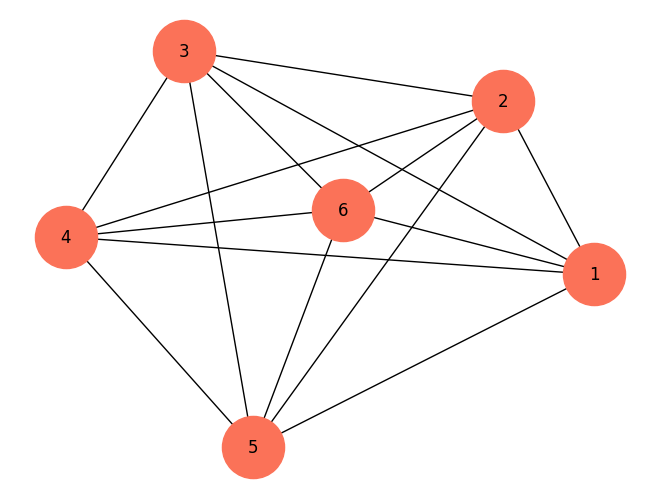

In [7]:
import networkx as nx
from math import e

distances = [(1, 2, 20),
             (1, 3, 40),
             (1, 4, 42),
             (1, 5, 33),
             (1, 6, 21),
             (2, 3, 26),
             (2, 4, 38),
             (2, 5, 42),
             (2, 6, 17),
             (3, 4, 22),
             (3, 5, 43),
             (3, 6, 21),
             (4, 5, 27),
             (4, 6, 22),
             (5, 6, 26)]

v = [1, 4, 5, 2, 6, 3, 1] # последовательность прлхождения маршрута
z = [(3, 4),
     (4, 6),
     (5, 2),
     (6, 3)] # последовательность замен вершин
p = [49, 54, 43, 54] # случайные числа, выпавшие в процессе счета

T = 100 # начальная температура


def probability(delta, T):
    return 100 * e**(-delta / T)


def reductTemp(prevT):
    nextT = prevT * 0.5

    return nextT


graph = nx.Graph()
graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

best route: [1, 6, 5, 3, 4, 2, 1]
route length: 170
lengths of all routes: [189, 209, 186, 146, 170]


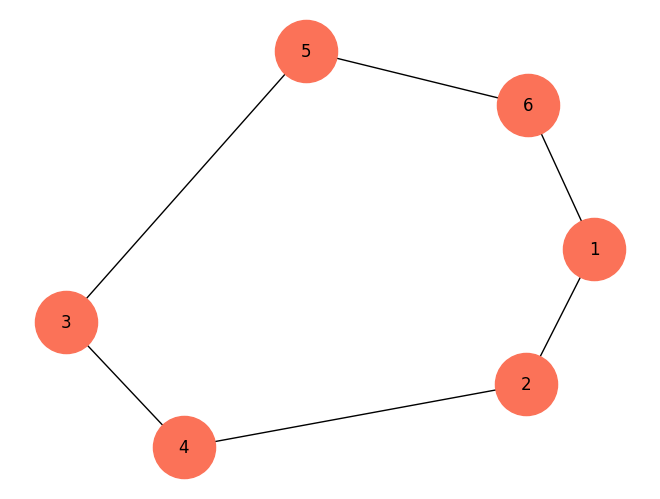

In [11]:
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[0] == j and item[1] == i) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
    

def routeLength(v, distances):
    edges = []

    for i in range(len(v) - 1):
        edges.append(edgeLength(v[i], v[i + 1], distances))

    return sum(edges)


def routeOneReplacement(arrV, z, replacementByName = True):
    decrement = 1 if replacementByName else 0

    arrV[z[0] - decrement], arrV[z[1] - decrement] = arrV[z[1] - decrement], arrV[z[0] - decrement]

    return arrV


def routeReplacement(v, z):
    for item in z:
        v = routeOneReplacement(v, item)
    return v


def chooseRoute(distances, v, z, T, p):
    sumLength = routeLength(v, distances)
    arrSum = [sumLength]

    for i in range(len(z)):
        newV = routeOneReplacement(v[:], z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength

        if deltaS < 0:
            probab = probability(deltaS, T)

            if probab > p[i]:
                v = newV
                sumLength = newS
        else:
            v = newV
            sumLength = newS

        T = reductTemp(T)

    return v, arrSum


def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] \
            or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
            
    graph = nx.Graph()

    graph.add_weighted_edges_from(newDistances)

    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)


bestRoute, arrLength = chooseRoute(distances, v, z, T, p)

print(f'best route: {bestRoute}')
print(f'route length: {routeLength(bestRoute, distances)}')
print(f'lengths of all routes: {arrLength}')

drawRouteGraph(distances, bestRoute)
        

### Задача
Вариант 3

best route: [1, 6, 5, 3, 4, 2, 1]
route length: 160
lengths of all routes: [189, 209, 186, 146, 170]


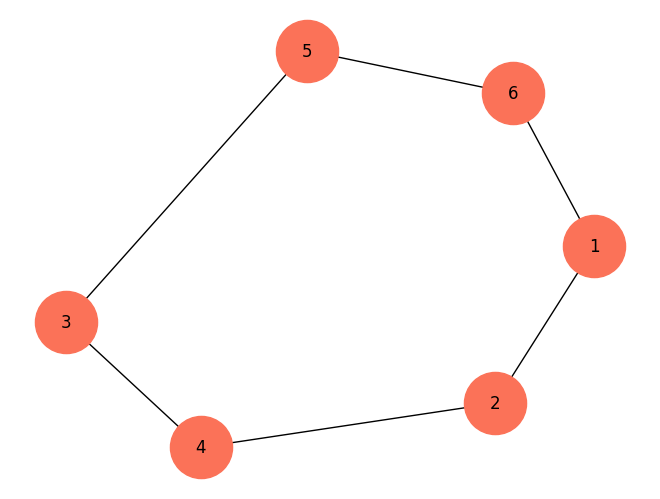

In [12]:
distances = [(1, 2, 23),
             (1, 3, 42),
             (1, 4, 40),
             (1, 5, 25),
             (1, 6, 22),
             (2, 3, 20),
             (2, 4, 30),
             (2, 5, 34),
             (2, 6, 13),
             (3, 4, 22),
             (3, 5, 41),
             (3, 6, 21),
             (4, 5, 26),
             (4, 6, 19),
             (5, 6, 22)]

v = [1, 3, 4, 5, 6, 2, 1] # последовательность прлхождения маршрута
z = [(2, 4),
     (3, 4),
     (4, 6),
     (5, 6)] # последовательность замен вершин
p = [78, 24, 63, 17] # случайные числа, выпавшие в процессе счета


print(f'best route: {bestRoute}')
print(f'route length: {routeLength(bestRoute, distances)}')
print(f'lengths of all routes: {arrLength}')

drawRouteGraph(distances, bestRoute)